Loading MP3 file...
Sample rate: 48000 Hz, Audio shape: (631296, 2)
Enter password for encryption: 1234
Encrypted and decrypted files saved as 'encrypted.wav' and 'decrypted.wav'
Playing original audio:


Playing encrypted audio (distorted):


Playing decrypted audio:


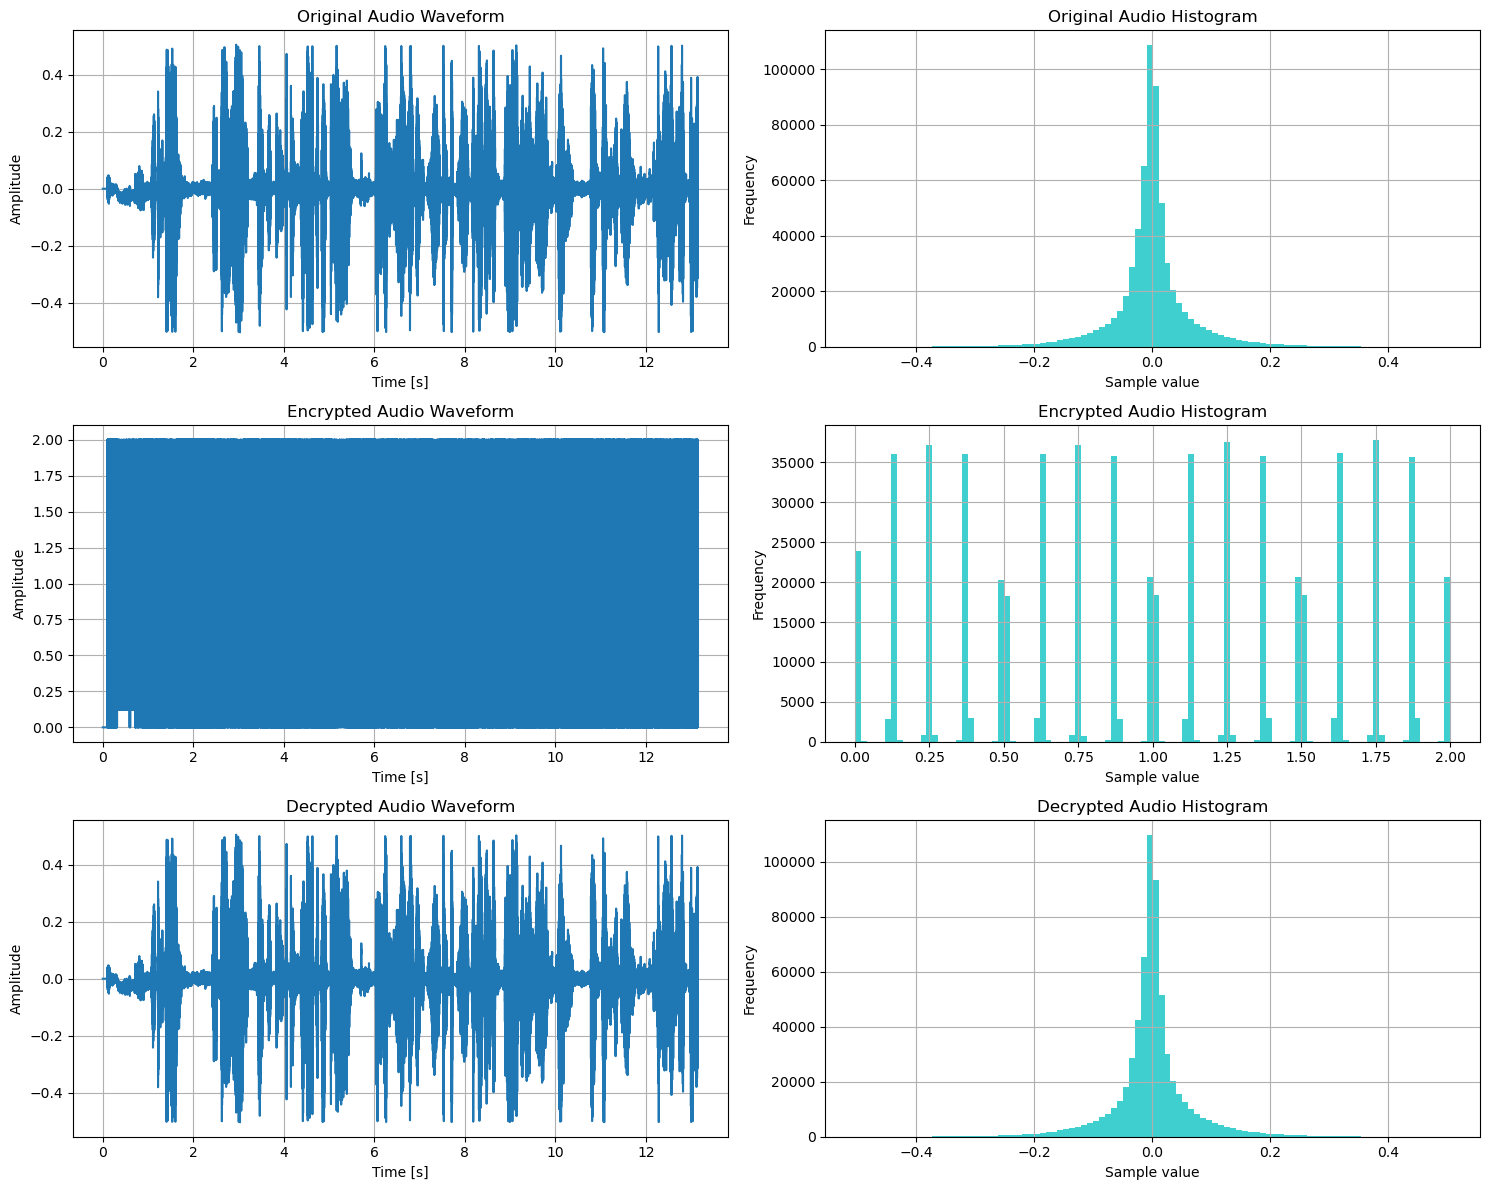

C:\Users\PMLS\AppData\Local\Temp\ipykernel_14868\3453798510.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


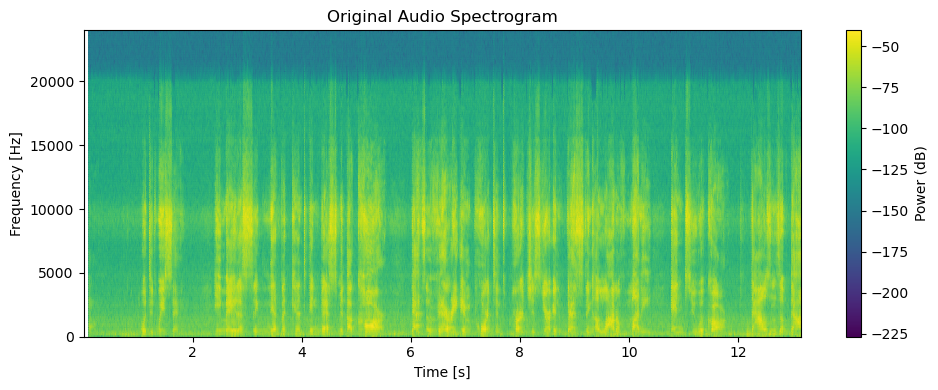

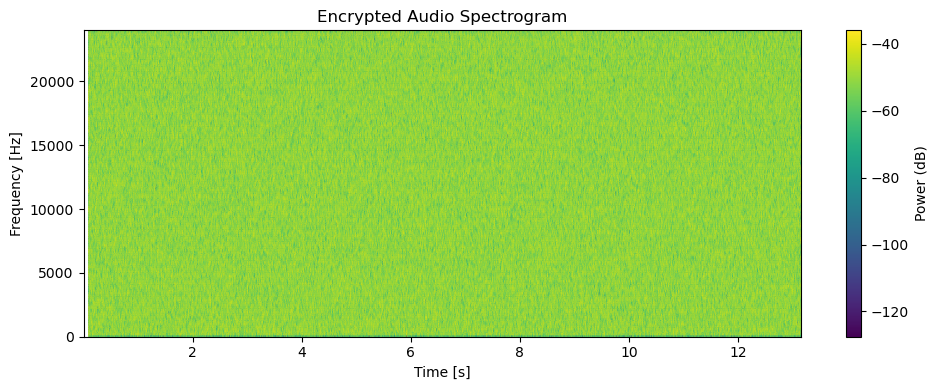

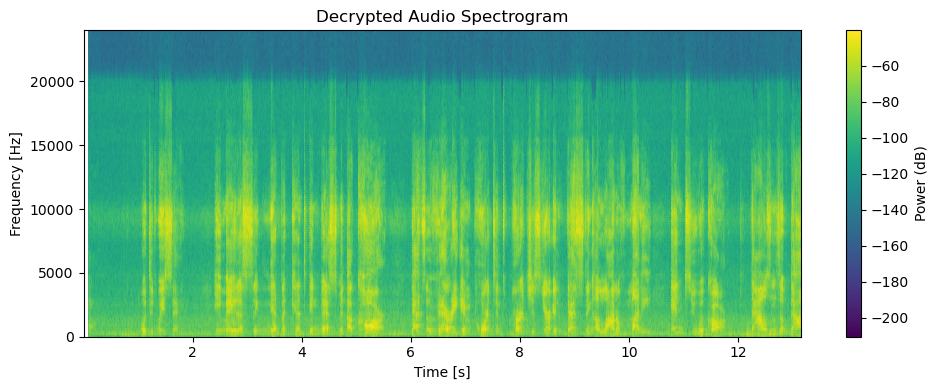

In [1]:
from pydub import AudioSegment
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import hashlib
from scipy.signal import spectrogram

# -------------------------------
# 1. Load MP3 and convert to NumPy
# -------------------------------
def load_mp3_to_numpy(file_path):
    audio = AudioSegment.from_file(file_path, format="mp3")
    samples = np.array(audio.get_array_of_samples())
    if audio.channels == 2:
        samples = samples.reshape((-1, 2))
    samples = samples.astype(np.float32) / (2**15)
    return samples, audio.frame_rate

# -------------------------------
# 2. Generate Key
# -------------------------------
def generate_key_from_password(password):
    hash_digest = hashlib.sha256(password.encode()).hexdigest()
    return int(hash_digest[:4], 16) % 16

# -------------------------------
# 3. Bit Rotation Functions
# -------------------------------
def bit_rotate_left(x, n):
    return ((x << n) & 0xFFFF) | ((x & 0xFFFF) >> (16 - n))

def bit_rotate_right(x, n):
    return ((x & 0xFFFF) >> n) | ((x << (16 - n)) & 0xFFFF)

# -------------------------------
# 4. Encryption & Decryption
# -------------------------------
def encrypt_rotate(audio_data, key):
    n = key % 16
    int_data = (audio_data * 32767).astype(np.int16)
    encrypted_int = np.array([bit_rotate_left(x, n) for x in int_data.flatten()], dtype=np.uint16)
    encrypted_int = encrypted_int.reshape(int_data.shape)
    encrypted_float = encrypted_int.astype(np.float32) / 32767
    return encrypted_float

def decrypt_rotate(encrypted_data, key):
    n = key % 16
    int_data = (encrypted_data * 32767).astype(np.uint16)
    decrypted_int = np.array([bit_rotate_right(x, n) for x in int_data.flatten()], dtype=np.uint16)
    decrypted_int = decrypted_int.reshape(int_data.shape).astype(np.int16)
    decrypted_float = decrypted_int.astype(np.float32) / 32767
    return decrypted_float

# -------------------------------
# 5. Visualization Functions
# -------------------------------
def plot_waveform(audio_data, samplerate, title, subplot_position):
    plt.subplot(subplot_position)
    time_axis = np.linspace(0, len(audio_data) / samplerate, num=len(audio_data))
    plt.plot(time_axis, audio_data)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

def plot_histogram(audio_data, title, subplot_position):
    plt.subplot(subplot_position)
    plt.hist(audio_data.flatten(), bins=100, color='c', alpha=0.75)
    plt.title(title)
    plt.xlabel("Sample value")
    plt.ylabel("Frequency")
    plt.grid(True)

def plot_spectrogram(audio_data, samplerate, title):
    f, t, Sxx = spectrogram(audio_data, samplerate)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Power (dB)')
    plt.tight_layout()
    plt.show()

# -------------------------------
# 6. Main Function
# -------------------------------
def main():
    input_file = r"C:\\Users\\PMLS\\Desktop\\LECTURE RECORDING 1.mp3"  # Change path
    print("Loading MP3 file...")
    audio_data, samplerate = load_mp3_to_numpy(input_file)
    print(f"Sample rate: {samplerate} Hz, Audio shape: {audio_data.shape}")

    password = input("Enter password for encryption: ")
    key = generate_key_from_password(password)

    encrypted_audio = encrypt_rotate(audio_data, key)
    decrypted_audio = decrypt_rotate(encrypted_audio, key)

    sf.write("encrypted.wav", encrypted_audio, samplerate)
    sf.write("decrypted.wav", decrypted_audio, samplerate)
    print("Encrypted and decrypted files saved as 'encrypted.wav' and 'decrypted.wav'")

    print("Playing original audio:")
    display(Audio(audio_data[:, 0] if audio_data.ndim > 1 else audio_data, rate=samplerate))

    print("Playing encrypted audio (distorted):")
    display(Audio(encrypted_audio[:, 0] if encrypted_audio.ndim > 1 else encrypted_audio, rate=samplerate))

    print("Playing decrypted audio:")
    display(Audio(decrypted_audio[:, 0] if decrypted_audio.ndim > 1 else decrypted_audio, rate=samplerate))

    # Plot Waveform & Histogram
    plt.figure(figsize=(15, 12))
    original_plot_data = audio_data[:, 0] if audio_data.ndim > 1 else audio_data
    encrypted_plot_data = encrypted_audio[:, 0] if encrypted_audio.ndim > 1 else encrypted_audio
    decrypted_plot_data = decrypted_audio[:, 0] if decrypted_audio.ndim > 1 else decrypted_audio

    plot_waveform(original_plot_data, samplerate, "Original Audio Waveform", 321)
    plot_histogram(original_plot_data, "Original Audio Histogram", 322)
    plot_waveform(encrypted_plot_data, samplerate, "Encrypted Audio Waveform", 323)
    plot_histogram(encrypted_plot_data, "Encrypted Audio Histogram", 324)
    plot_waveform(decrypted_plot_data, samplerate, "Decrypted Audio Waveform", 325)
    plot_histogram(decrypted_plot_data, "Decrypted Audio Histogram", 326)

    plt.tight_layout()
    plt.show()

    # Plot Spectrograms
    plot_spectrogram(original_plot_data, samplerate, "Original Audio Spectrogram")
    plot_spectrogram(encrypted_plot_data, samplerate, "Encrypted Audio Spectrogram")
    plot_spectrogram(decrypted_plot_data, samplerate, "Decrypted Audio Spectrogram")

# -------------------------------
# 7. Run the program
# -------------------------------
if __name__ == "__main__":
    main()
